In [1]:
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [2]:
## Data

# Charmonium 2017E

#file = '../output/Charmonium2017E_test_loose_cuts/Charmonium2017E_test_loose_cuts_hists.coffea'

#### Charmonium 2018B
file = '../output/Charmonium2018B_test/Charmonium2018B_test_hists.coffea'

#file = '../output/Charmonium_2018B_comp/Charmonium_2018B_comp_hists.coffea'

#file = '../output/Charmonium2018B_vertex/Charmonium2018B_vertex_hists.coffea'

## Prompt x NonPrompt
#file = '../output/Charmonium_2018B_prompt/Charmonium_2018B_prompt_hists.coffea'
#file = '../output/Charmonium_2018B_nonprompt/Charmonium_2018B_nonprompt_hists.coffea'


## Monte Carlo

#file = '../output/JpsiDstar_2017/JpsiDstar_2017_hists.coffea'

#file = '../output/JpsiDstar_2017_test_loose_cuts_tests/JpsiDstar_2017_test_loose_cuts_tests_hists.coffea'

#file = '../output/test_gen/test_gen_hists.coffea'

#file = 'output/MuOnia_test/MuOnia_test_hists.coffea'

hists = load(file)
hists.values()

dict_values([<Hist (npvs) instance at 0x7f1fb2d4bba8>, <Hist (pt,eta,phi) instance at 0x7f1f886764e0>, <Hist (pt,eta,phi) instance at 0x7f1f8861b080>, <Hist (mass) instance at 0x7f1f8861b438>, <Hist (pt,eta,phi) instance at 0x7f1f8861b630>, <Hist (rap) instance at 0x7f1f8861ba58>, <Hist (dl) instance at 0x7f1f8861bc50>, <Hist (dlSig) instance at 0x7f1f8861beb8>, <Hist (chi2) instance at 0x7f1f88620160>, <Hist (cosphi) instance at 0x7f1f886203c8>, <Hist (mass) instance at 0x7f1f88620630>, <Hist (pt,eta,phi) instance at 0x7f1f88620898>, <Hist (rap) instance at 0x7f1f88620cc0>, <Hist (dl) instance at 0x7f1f88620eb8>, <Hist (dlSig) instance at 0x7f1f88624128>, <Hist (chi2) instance at 0x7f1f88624358>, <Hist (cosphi) instance at 0x7f1f88624588>, <Hist (mass) instance at 0x7f1f886247b8>, <Hist (pt,eta,phi) instance at 0x7f1f88624a20>, <Hist (rap) instance at 0x7f1f88624e80>, <Hist (dl) instance at 0x7f1f886290b8>, <Hist (dlSig) instance at 0x7f1f886292e8>, <Hist (chi2) instance at 0x7f1f8862

In [3]:
## Function to compute the ratio between the right charge and wrong charge D*
def get_dstar_weight(hist_dstar, hist_wrg_chg):
    # Take the values of the histograms
    hist_dstar_values = hist_dstar.values().get(())
    hist_wrg_chg_values = hist_wrg_chg.values().get(())
    # Consider from the half to avoid the peak.
    x = int(len(hist_dstar_values)/2)
    hist_dstar_values = hist_dstar_values[x:]
    hist_wrg_chg_values = hist_wrg_chg_values[x:]
    # Calculate the ratio
    ratio = hist_dstar_values/hist_wrg_chg_values

    return ratio.mean()

In [4]:
## Plot the D* histogram without background
# Right charge is the first argument.
def ratio_plot(num, denom):
    # make a nice ratio plot, adjusting some font sizes
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10,10),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.07)

    # Here is an example of setting up a color cycler to color the various fill patches
    # We get the colors from this useful utility: http://colorbrewer2.org/
    from cycler import cycler
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    ax.set_prop_cycle(cycler(color=colors))

    fill_opts = {
        'edgecolor': (0,0,0,0.3),
        'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    # Plot right charge first
    hist.plot1d(
        num,
        ax=ax,
        clear=False,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )
    # Plot wrong charge 
    hist.plot1d(
        denom,
        ax=ax,
        clear=False,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    ax.autoscale(axis='x', tight=True)
    ax.set_ylim(0, None)
    ax.set_xlabel(None)

    # now we build the ratio plot
    hist.plotratio(
        num=num,
        denom=denom,
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )
    rax.set_ylabel('Ratio')
    rax.set_ylim(0, 15)
    
    return ax, rax

In [5]:
def create_plot1d(hist1d, log=False, ax=None):
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
    }
    
    data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}

    
    ax = hist.plot1d(hist1d, ax=ax)#, error_opts=data_err_opts)
    
    # CMS style
    
    CMS = plt.text(0.03, 0.93, "CMS",
                  fontsize=22,
                  fontweight='bold',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    pre = plt.text(0.03, 0.88, "Preliminary",
                  fontsize=19,
                  fontstyle='italic',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    lumi = plt.text(1., 1., r"9.31 fb$^{-1}$ (13 TeV)",
                fontsize=18,
                fontstyle='normal',
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
    
    axis = hist1d.axes()[0]
    centers = axis.centers()
    values = np.where(hist1d.values().get(()) < 0, 0, hist1d.values().get(()))
    
    # compute mean and std:
    mean = np.sum(values*centers)/np.sum(values)
    std = np.sqrt(np.sum(values*((centers - mean)**2))/np.sum(values))
    
    annotation = TextArea(f"Total: {np.sum(values):.2e}" \
                    + "\n" + f"Mean: {mean:.2e}" \
                    + "\n" + f"Std: {std:.2e}", textprops=dict(size=14))
    
    at = AnchoredOffsetbox('upper right', child=annotation)
    at.patch.set_facecolor('None')
    ax.add_artist(at)
    
    ax.legend().remove()
    
    return ax

In [6]:
def create_plot2d(hist2d, ax=None, xaxis=None):
    plt.style.use(mplhep.style.CMS)
    
    if xaxis == None:
        xaxis = hist2d.axes()[0]
        
    ax = hist.plot2d(hist2d, xaxis, ax=ax)
    
    return ax

In [7]:
def kinematics_plot(hist_p, hist_mass=None):
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    
    fig, ((ax_pt, ax_eta), (ax_phi, ax_mass)) = plt.subplots(
        nrows=2,
        ncols=2,
        figsize=(16,16),
    )
    
    create_plot1d(hist_p.sum('eta', 'phi'), ax=ax_pt, log=True)
    create_plot1d(hist_p.sum('pt', 'phi'), ax=ax_eta, log=False)
    create_plot1d(hist_p.sum('pt', 'eta'), ax=ax_phi, log=False)
    
    if not hist_mass == None:
        create_plot1d(hist_mass, ax=ax_mass, log=False)
    else:
        ax_mass.annotate("Mass plot not provided", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
        
    return ((ax_pt, ax_eta), (ax_phi, ax_mass))

In [ ]:
ax = create_plot1d(hists['Primary_vertex_npvs'])

In [ ]:
ax = create_plot1d(hists['GenPart_pdgId'])

In [ ]:
ax = create_plot1d(hists['GenJpsi_p'].sum('eta', 'phi'))

In [ ]:
# Muon Lead
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Muon_lead_p'])

In [ ]:
# Muon Trail
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Muon_trail_p'])

In [ ]:
# Psi
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Psi_p'], hists['Psi_mass'])

In [ ]:
ax = create_plot1d(hists['Psi_p'].sum('pt','phi'))
#ax.set_yscale('log')
#ax.set_ylim(0,1e5)
#ax.set_xlim(0,100)

In [ ]:
# Signigicance plot - log scale
ax = create_plot1d(hists['Psi_dlSig'])
#ax.set_yscale('log')
#ax.set_xlim(-30, 55)
#ax.set_ylim(10, 1e6)

In [ ]:
ax = create_plot1d(hists['Psi_chi2'])

In [ ]:
ax = create_plot1d(hists['Psi_cosphi'])

In [ ]:
# D0
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['D0_p'], hists['D0_mass12'])

In [ ]:

fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
}
err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'elinewidth': 1,
}
    
ax = hist.plot1d(hists['D0_mass12'])
hist.plot1d(hists['D0_mass21'])

handles, labels = ax.get_legend_handles_labels()
labels = ['$m_{K \pi}$', '$m_{\pi K}$']
ax.legend(handles, labels, prop={'size': 16})

ax.set_xlabel('$m_{D^0}$')

In [ ]:
ax = create_plot1d(hists['D0_rap'])

In [ ]:
ax = create_plot1d(hists['D0_dlSig'])

In [ ]:
ax = create_plot1d(hists['D0_chi2'])

In [ ]:
ax = create_plot1d(hists['D0_cosphi'])

In [ ]:
ax = create_plot2d(hists['D0_p'].sum('phi'), xaxis='eta')
#ax.set_ylim(3,10)

In [ ]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['D0_trk_p'])

In [ ]:
ax = hist.plot1d(hists['D0_trk_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 1e5)

In [ ]:
ax = create_plot1d(hists['D0_trk_chindof'])

In [ ]:
ax = create_plot1d(hists['D0_trk_nValid'])

In [ ]:
ax = create_plot1d(hists['D0_trk_nPix'])

In [ ]:
ax = create_plot1d(hists['D0_trk_dxy'])

In [ ]:
ax = create_plot1d(hists['D0_trk_dz'])

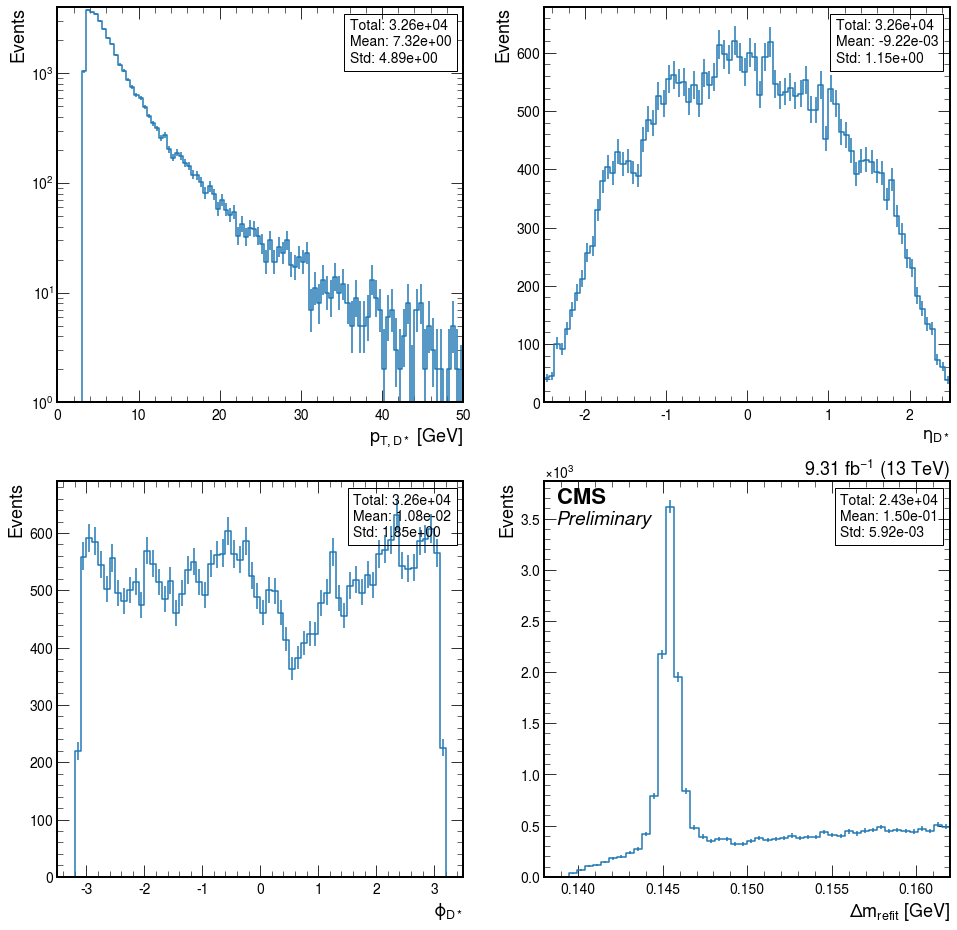

In [15]:
# Dstar right charge
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_p'].integrate('chg', 'right charge'), 
                                                       hists['Dstar_deltamr'].integrate('chg', 'right charge'))

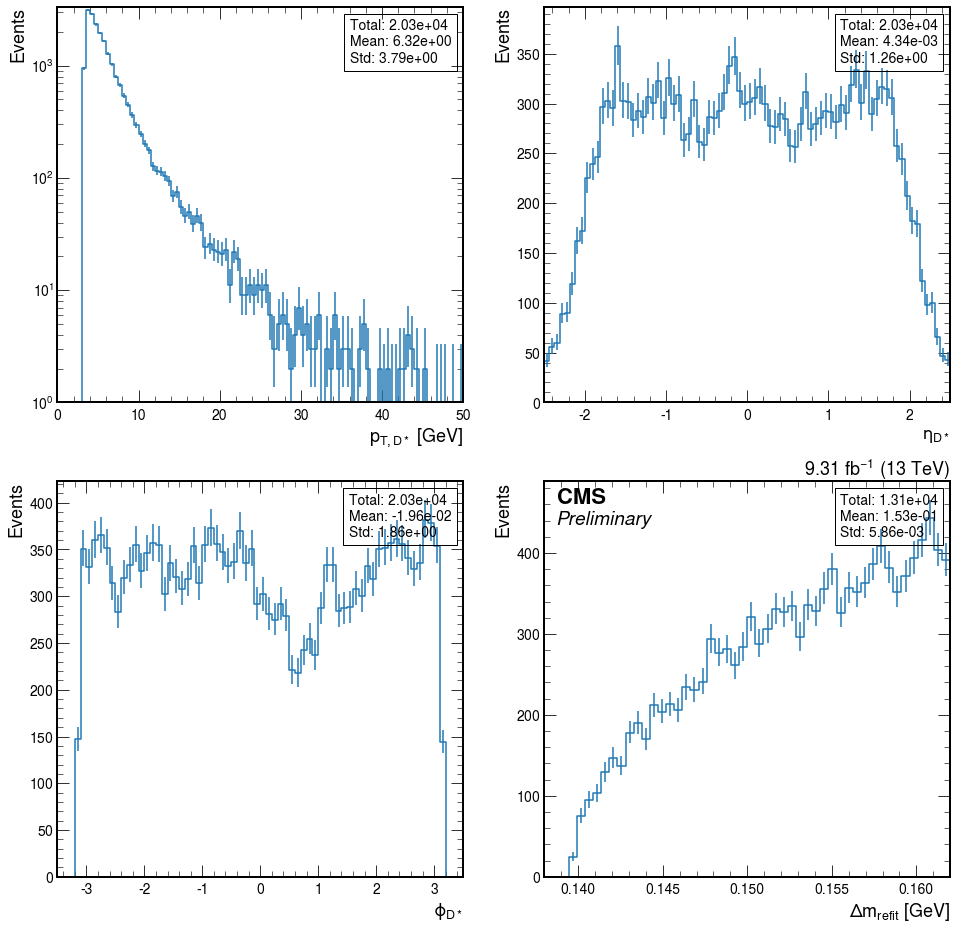

In [16]:
# Dstar wrg charge
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_p'].integrate('chg', 'wrong charge'), 
                                                       hists['Dstar_deltamr'].integrate('chg', 'wrong charge'))

weight: 1.187581225506235


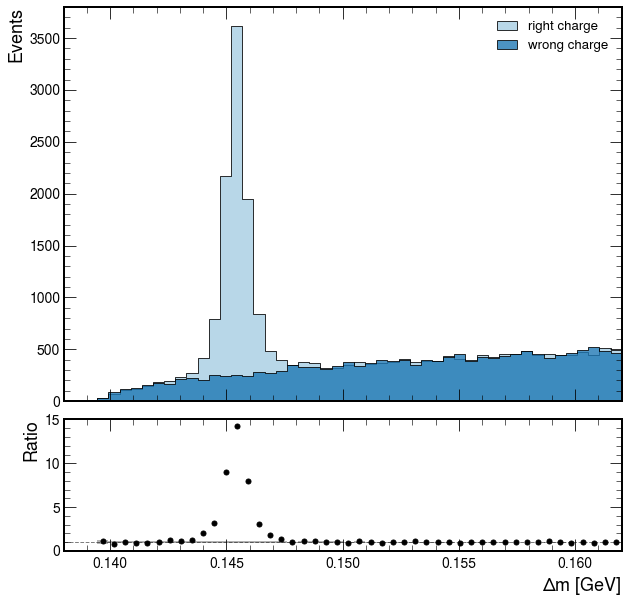

In [89]:
# Dstar wrg chg plot
hist_wrg_chg = hists['Dstar_deltamr'].integrate('chg', 'wrong charge')
hist_rgt_chg = hists['Dstar_deltamr'].integrate('chg', 'right charge')

w = get_dstar_weight(hist_rgt_chg, hist_wrg_chg)
hist_wrg_chg.scale(w)

ax, rax = ratio_plot(hist_rgt_chg, hist_wrg_chg)

handles, labels = ax.get_legend_handles_labels()
labels = ['right charge', 'wrong charge']

leg = ax.legend(handles, labels)

rax.set_xlabel('$\Delta m$ [GeV]')
print(f"weight: {w}")

In [90]:
hist_wrg_chg.scale(-1)
histo = hist_rgt_chg + hist_wrg_chg
hist_wrg_chg.scale(-1)
ax = create_plot1d(histo)
ax.legend().remove()

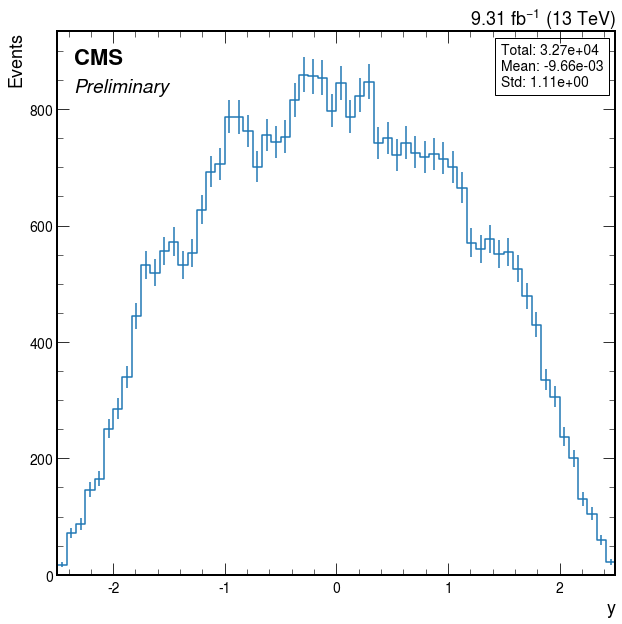

In [21]:
ax = create_plot1d(hists['Dstar_rap'].integrate('chg', 'right charge'))

In [ ]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_K_p'])

In [ ]:
ax = hist.plot1d(hists['Dstar_K_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 4.2e305)

In [ ]:
ax = create_plot2d(hists['Dstar_K_p'].sum('phi'))
ax.set_xlim(0, 10)

In [ ]:
ax = create_plot1d(hists['Dstar_K_chindof'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_nValid'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_nPix'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_K_dz'])

In [ ]:
ax = create_plot2d(hists['Dstar_K_pt_eta'])

In [ ]:
# Dstar pi
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_pi_p'])

In [ ]:
ax = hist.plot1d(hists['Dstar_pi_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 2.9e3)

In [ ]:
ax = create_plot1d(hists['Dstar_pi_chindof'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_nValid'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_nPix'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_pi_dz'])

In [ ]:
# Dstar pis
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['Dstar_pis_p'])

In [ ]:
ax = hist.plot1d(hists['Dstar_pis_p'].sum('phi','eta'), fill_opts=fill_opts)

ax.set_xlim(0, 4)
ax.set_ylim(1, 1.3e4)

In [ ]:
ax = create_plot1d(hists['Dstar_pis_chindof'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_nValid'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_nPix'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_dxy'])

In [ ]:
ax = create_plot1d(hists['Dstar_pis_dz'])

In [ ]:
# Associated Psi Dstar
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['PsiDstar']['Psi_p'], hists['PsiDstar']['Psi_mass'])

In [ ]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['PsiDstar']['Dstar_p'].integrate('chg', 'right charge'),
                                                       hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [8]:
# Takes the histograms wrong charge and right charge respectively
hist_wrg_chg = hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'wrong charge')
hist_rgt_chg = hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge')

# Use the function to calculate the weight
w = get_dstar_weight(hist_rgt_chg, hist_wrg_chg)
# Multiply the wrong charge with the scale in order to do the subtraction
hist_wrg_chg.scale(w)

ax, rax = ratio_plot(hist_rgt_chg, hist_wrg_chg)

handles, labels = ax.get_legend_handles_labels()
labels = ['right charge', 'wrong charge']

leg = ax.legend(handles, labels)

rax.set_xlabel('$\Delta m$ [GeV]')
print(f"weight: {w}")

In [ ]:
ax = create_plot1d(hists['PsiDstar']['PsiDstar_mass'])
ax.set_xlim(0, 100)

In [ ]:
ax = create_plot1d(hists['PsiDstar']['PsiDstar_deltarap'])

In [ ]:
# Associated Psi Dstar
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['PsiDstar']['Psi_p'], hists['PsiDstar']['Psi_mass'])

In [ ]:
((ax_pt, ax_eta), (ax_phi, ax_mass)) = kinematics_plot(hists['PsiDstar']['Dstar_p'].integrate('chg', 'right charge'),
                                                       hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

weight: 1.8938095238095238


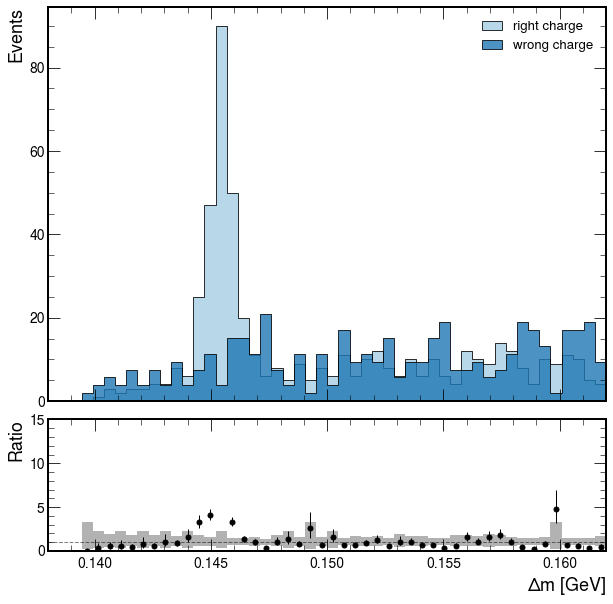

In [17]:
hist_wrg_chg = hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'wrong charge')
hist_rgt_chg = hists['PsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge')

w = get_dstar_weight(hist_rgt_chg, hist_wrg_chg)
hist_wrg_chg.scale(w)

ax, rax = ratio_plot(hist_rgt_chg, hist_wrg_chg)

handles, labels = ax.get_legend_handles_labels()
labels = ['right charge', 'wrong charge']

leg = ax.legend(handles, labels)

rax.set_xlabel('$\Delta m$ [GeV]')
print(f"weight: {w}")

In [ ]:
ax = create_plot1d(hists['PsiDstar']['PsiDstar_mass'])
ax.set_xlim(0, 100)

In [ ]:
ax = create_plot1d(hists['PsiDstar']['PsiDstar_deltarap'])